# Customer Credit Risk Analysis
## Project Overview:
In the banking sector, assessing the creditworthiness of customers is paramount. This project focuses on predicting the credit risk of bank customers. By leveraging financial and personal data, we aim to predict if a customer is likely to default on a loan or credit card payment (denoted as 'label' in the dataset).

## Datasets:

**customer_data.csv:** This dataset provides personal details and characteristics of bank customers.

**payment_data.csv:** This contains financial data about the customers, capturing payment histories, balance details, and other relevant financial behaviors.

## Key Steps:

**Exploratory Data Analysis (EDA):** A deep dive into the data was performed to identify distributions, relationships, and unique characteristics. This included various visualizations, summary statistics, and correlation matrices.

**Data Cleaning & Preprocessing:** Missing values were addressed, outliers were capped, and specific features were engineered to capture the nuances of credit behavior better.

**Data Merging:** The two datasets were merged using a common 'ID' feature to create a holistic data view.

**Modeling:** Various machine learning algorithms, including Logistic Regression, Random Forest, Neural Networks, and Gradient Boosting, were employed to predict credit risk. The models were evaluated using diverse metrics due to the inherent class imbalance.

**Feature Importance Analysis:** The Random Forest model was particularly useful in deciphering the importance of different features, providing insights into the key determinants of credit risk.

# Key Insights:
Features from both personal and financial data played crucial roles in predicting credit risk.
Addressing class imbalance was essential to ensure accurate and fair risk prediction.
The Random Forest model highlighted the most significant predictors of credit risk, helping the bank in making informed credit decisions.

## Tools & Libraries:
- Python
- pandas: Data manipulation and analysis.
- NumPy: Numerical computations.
- Matplotlib & Seaborn: Data visualization tools.
- Scikit-learn: Comprehensive library for data preprocessing and machine learning.
- XGBoost: Advanced gradient boosting framework.

# Importing the Libraries/Some EDA Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_data = pd.read_csv("customer_data.csv")
customer_data

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [3]:
# Start with EDA for customer_data

# 1. Understanding Data Structure and Types
data_structure_customer = customer_data.info()

# 2. Summary Statistics
summary_statistics_customer = customer_data.describe()

# 3. Missing Values
missing_values_customer = customer_data.isnull().sum()

# 4. Unique Values for Categorical Columns
unique_values_customer = customer_data.select_dtypes(include=['object']).nunique()

data_structure_customer, summary_statistics_customer, missing_values_customer, unique_values_customer



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


(None,
              label            id        fea_1        fea_2        fea_3  \
 count  1125.000000  1.125000e+03  1125.000000   976.000000  1125.000000   
 mean      0.200000  5.783677e+07     5.482667  1283.911373     2.333333   
 std       0.400178  1.817150e+06     1.383338    51.764022     0.878773   
 min       0.000000  5.498235e+07     1.000000  1116.500000     1.000000   
 25%       0.000000  5.499050e+07     4.000000  1244.000000     1.000000   
 50%       0.000000  5.898975e+07     5.000000  1281.500000     3.000000   
 75%       0.000000  5.899799e+07     7.000000  1314.500000     3.000000   
 max       1.000000  5.900624e+07     7.000000  1481.000000     3.000000   
 
               fea_4        fea_5        fea_6        fea_7        fea_8  \
 count  1.125000e+03  1125.000000  1125.000000  1125.000000  1125.000000   
 mean   1.208836e+05     1.928889    10.872000     4.832889   100.802667   
 std    8.844523e+04     0.257125     2.676437     2.971182    11.988955   
 mi

Total of 1125 entries and 13 columns.
The columns are mainly of integer and floating-point types.
- label: Binary classification label with values either 0 or 1.
- id: Unique identifier for each customer.
- fea_1 to fea_11: Various features with different scales and distributions.

For instance, fea_2 has a mean of ~1283 with a standard deviation of ~51.7.
Notably, fea_2 has missing values.

- The column fea_2 has 149 missing values out of 1125 total entries.

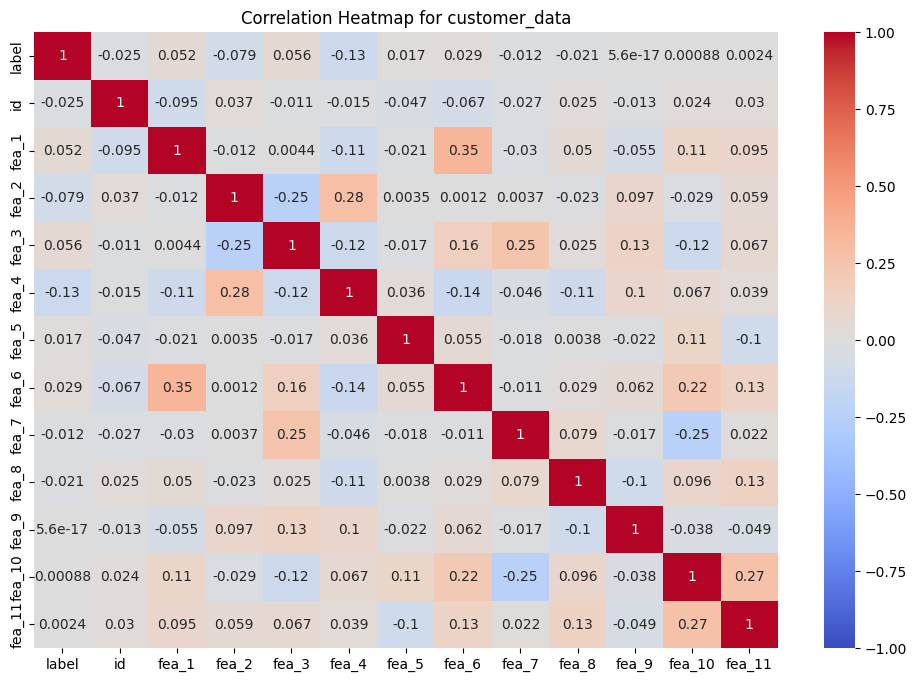

In [4]:
# Plot the heatmap for customer_data
plt.figure(figsize=(12, 8))
sns.heatmap(customer_data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for customer_data")
plt.show()

Most of the features (fea_1 to fea_11) have low to moderate correlations with each other and with the label column.

In [6]:
payment_data = pd.read_csv("payment_data.csv")
payment_data

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [7]:
# EDA for payment_data

# 1. Data Structure and Types
data_structure_payment = payment_data.info()

# 2. Summary Statistics
summary_statistics_payment = payment_data.describe()

# 3. Missing Values
missing_values_payment = payment_data.isnull().sum()

# 4. Unique Values for Categorical Columns
unique_values_payment = payment_data.select_dtypes(include=['object']).nunique()

data_structure_payment, summary_statistics_payment, missing_values_payment, unique_values_payment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


(None,
                  id       OVD_t1       OVD_t2       OVD_t3       OVD_sum  \
 count  8.250000e+03  8250.000000  8250.000000  8250.000000   8250.000000   
 mean   5.782173e+07     0.249091     0.127152     0.369212    187.681697   
 std    1.822724e+06     1.250197     0.860046     2.900320   1804.232570   
 min    5.498235e+07     0.000000     0.000000     0.000000      0.000000   
 25%    5.499050e+07     0.000000     0.000000     0.000000      0.000000   
 50%    5.898905e+07     0.000000     0.000000     0.000000      0.000000   
 75%    5.899655e+07     0.000000     0.000000     0.000000      0.000000   
 max    5.900624e+07    34.000000    34.000000    35.000000  31500.000000   
 
         pay_normal    prod_code     prod_limit   new_balance  highest_balance  
 count  8250.000000  8250.000000    2132.000000  8.250000e+03     7.841000e+03  
 mean     14.526667     8.232000   85789.702205  1.054042e+05     2.192027e+05  
 std      12.053627     3.533055   74345.828184  1.8877

Total of 8250 entries and 12 columns.
The columns are of integer, floating-point, and object (likely string or datetime) types.

- id: Unique identifier for each payment entry.
- OVD_t1 to OVD_t3: Overdue payment details. Most values are 0, indicating no overdue, but there are some higher values, with maximums reaching up to 35.
- OVD_sum: The sum of overdue payments, with a maximum value of 31,500.
- pay_normal: Indicates normal payments, with a maximum value of 36.
- prod_code: Product code, with values ranging from 0 to 27.
- prod_limit: Product limit, possibly indicating a credit limit or similar financial cap. This column has many missing values.
update_date and report_date: Date fields indicating updates or reports. These are currently in object (string) format.
- new_balance: Current balance of the customer, with a minimum value of -40,303.20 and a maximum value of 163,212,000.
- highest_balance: Highest balance observed for the customer, ranging from 501 to 180,000,500.

**Missing Values**

prod_limit has 6118 missing values.

update_date has 26 missing values.

highest_balance has 409 missing values.

report_date has 1114 missing values.

<ipython-input-8-5ae95aa4df6b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(payment_data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)


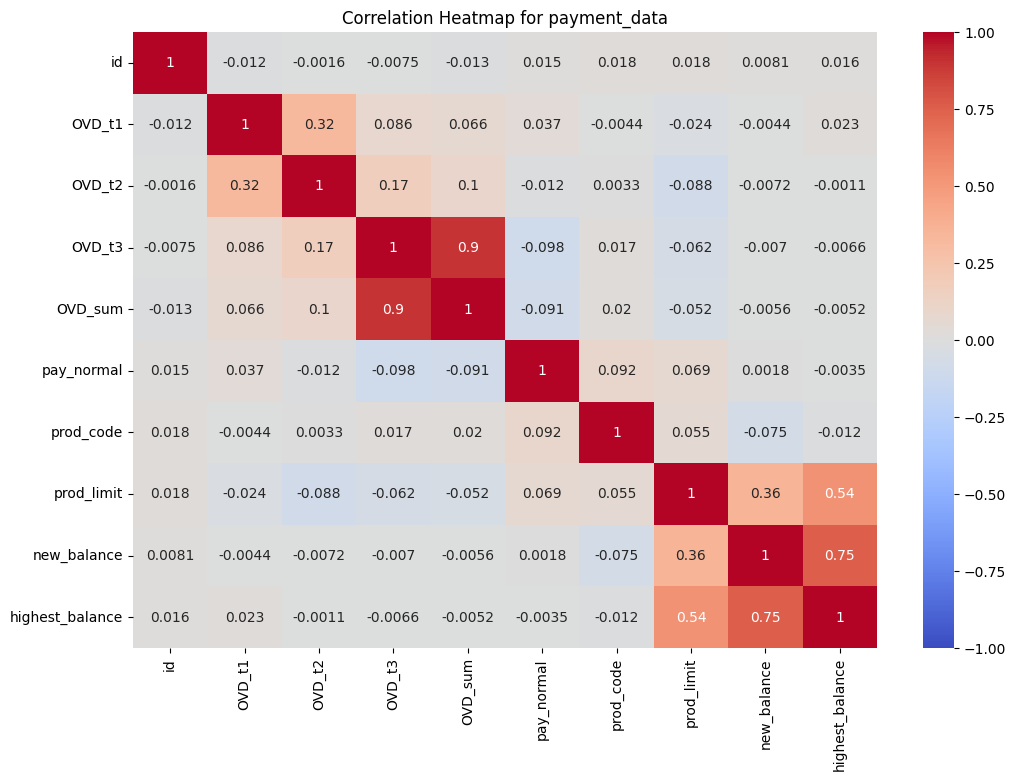

In [8]:
# Plot the heatmap for payment_data
plt.figure(figsize=(12, 8))
sns.heatmap(payment_data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for payment_data")
plt.show()

- Features like OVD_t1, OVD_t2, and OVD_t3 show correlations with each other, which is expected since they all relate to overdue payments.
- OVD_sum is also correlated with the above overdue features.
- new_balance and highest_balance have a strong positive correlation.

# Data Cleaning & Preprocessing

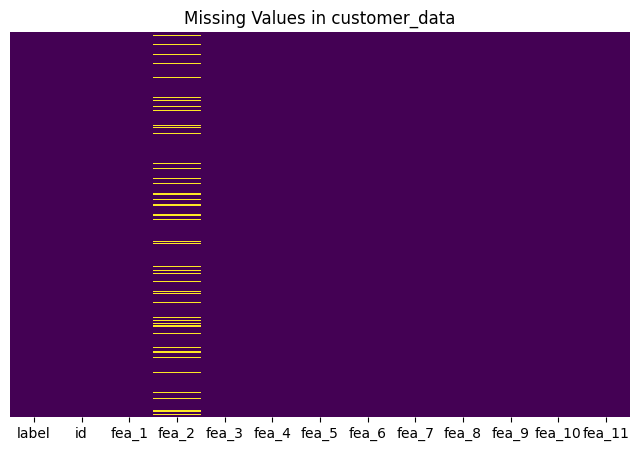

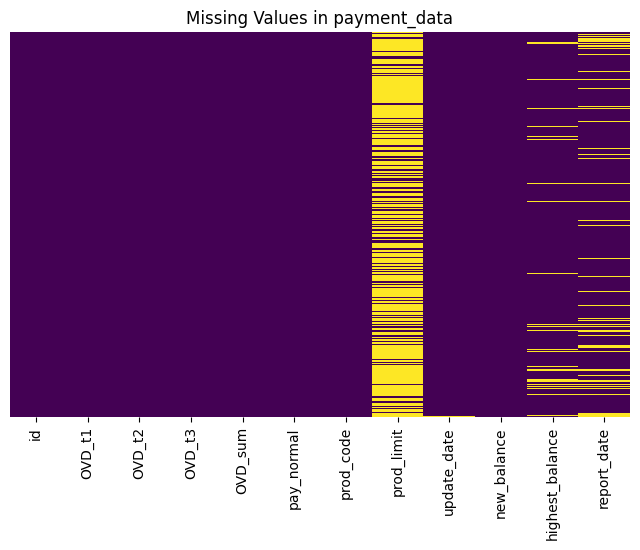

In [9]:
# Visualize missing values for customer_data using heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(customer_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values in customer_data")
plt.show()

# Visualize missing values for payment_data using heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(payment_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values in payment_data")
plt.show()


Before we move on the imputations on the customer_data dataset.
Let's visualize the distribution of fea_2 to decide on the appropriate imputation technique.

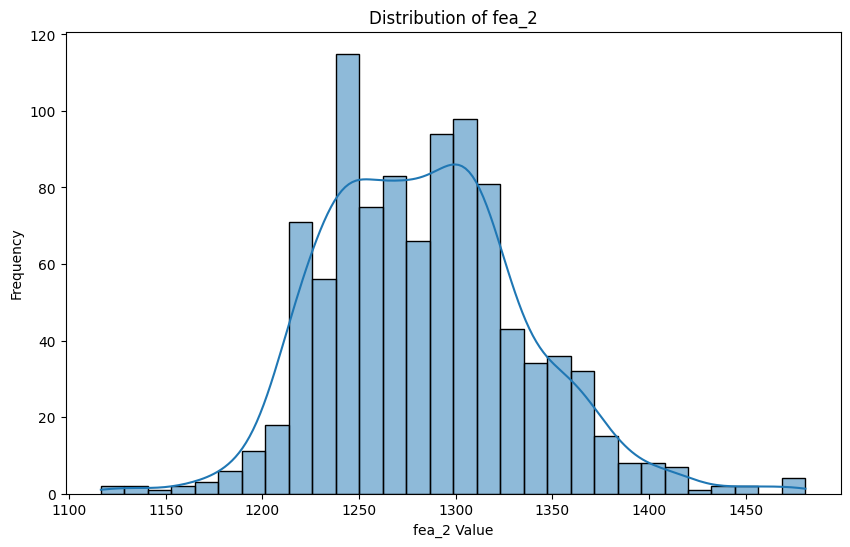

In [10]:
# Visualize the distribution of 'fea_2' in customer_data
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['fea_2'], bins=30, kde=True)
plt.title("Distribution of fea_2")
plt.xlabel("fea_2 Value")
plt.ylabel("Frequency")
plt.show()

The distribution of fea_2 appears to be right-skewed, with a longer tail on the right side.

Given this skewness, it's make sense to use the median for imputation, as it is less sensitive to extreme values compared to the mean.

In [11]:
# Impute the missing values in the 'fea_2' column using the median
customer_data['fea_2'].fillna(customer_data['fea_2'].median(), inplace=True)

# Check if all missing values in customer_data have been addressed
missing_customer_data = customer_data.isnull().sum()

missing_customer_data

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [12]:
# Dropping the 'prod_limit' column from payment_data
payment_data.drop('prod_limit', axis=1, inplace=True)

# Imputing missing values in payment_data
# Using mode for date columns
payment_data['update_date'].fillna(payment_data['update_date'].mode()[0], inplace=True)
payment_data['report_date'].fillna(payment_data['report_date'].mode()[0], inplace=True)

# Using median for the 'highest_balance' column due to potential skewness
payment_data['highest_balance'].fillna(payment_data['highest_balance'].median(), inplace=True)

# Check if all missing values in payment_data have been addressed
missing_payment_data = payment_data.isnull().sum()

missing_payment_data


id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
update_date        0
new_balance        0
highest_balance    0
report_date        0
dtype: int64

The prod_limit column was dropped due to a significant number of missing values.

The missing values in the update_date and report_date columns were imputed using the mode (most frequent date).

The highest_balance column's missing values were imputed using the median value.

### Visualization of the datasets
Let's visualize our datasets. This step will give us a clearer understanding of the data's characteristics, relationships between variables, and potential areas that may need further preprocessing or feature engineering.

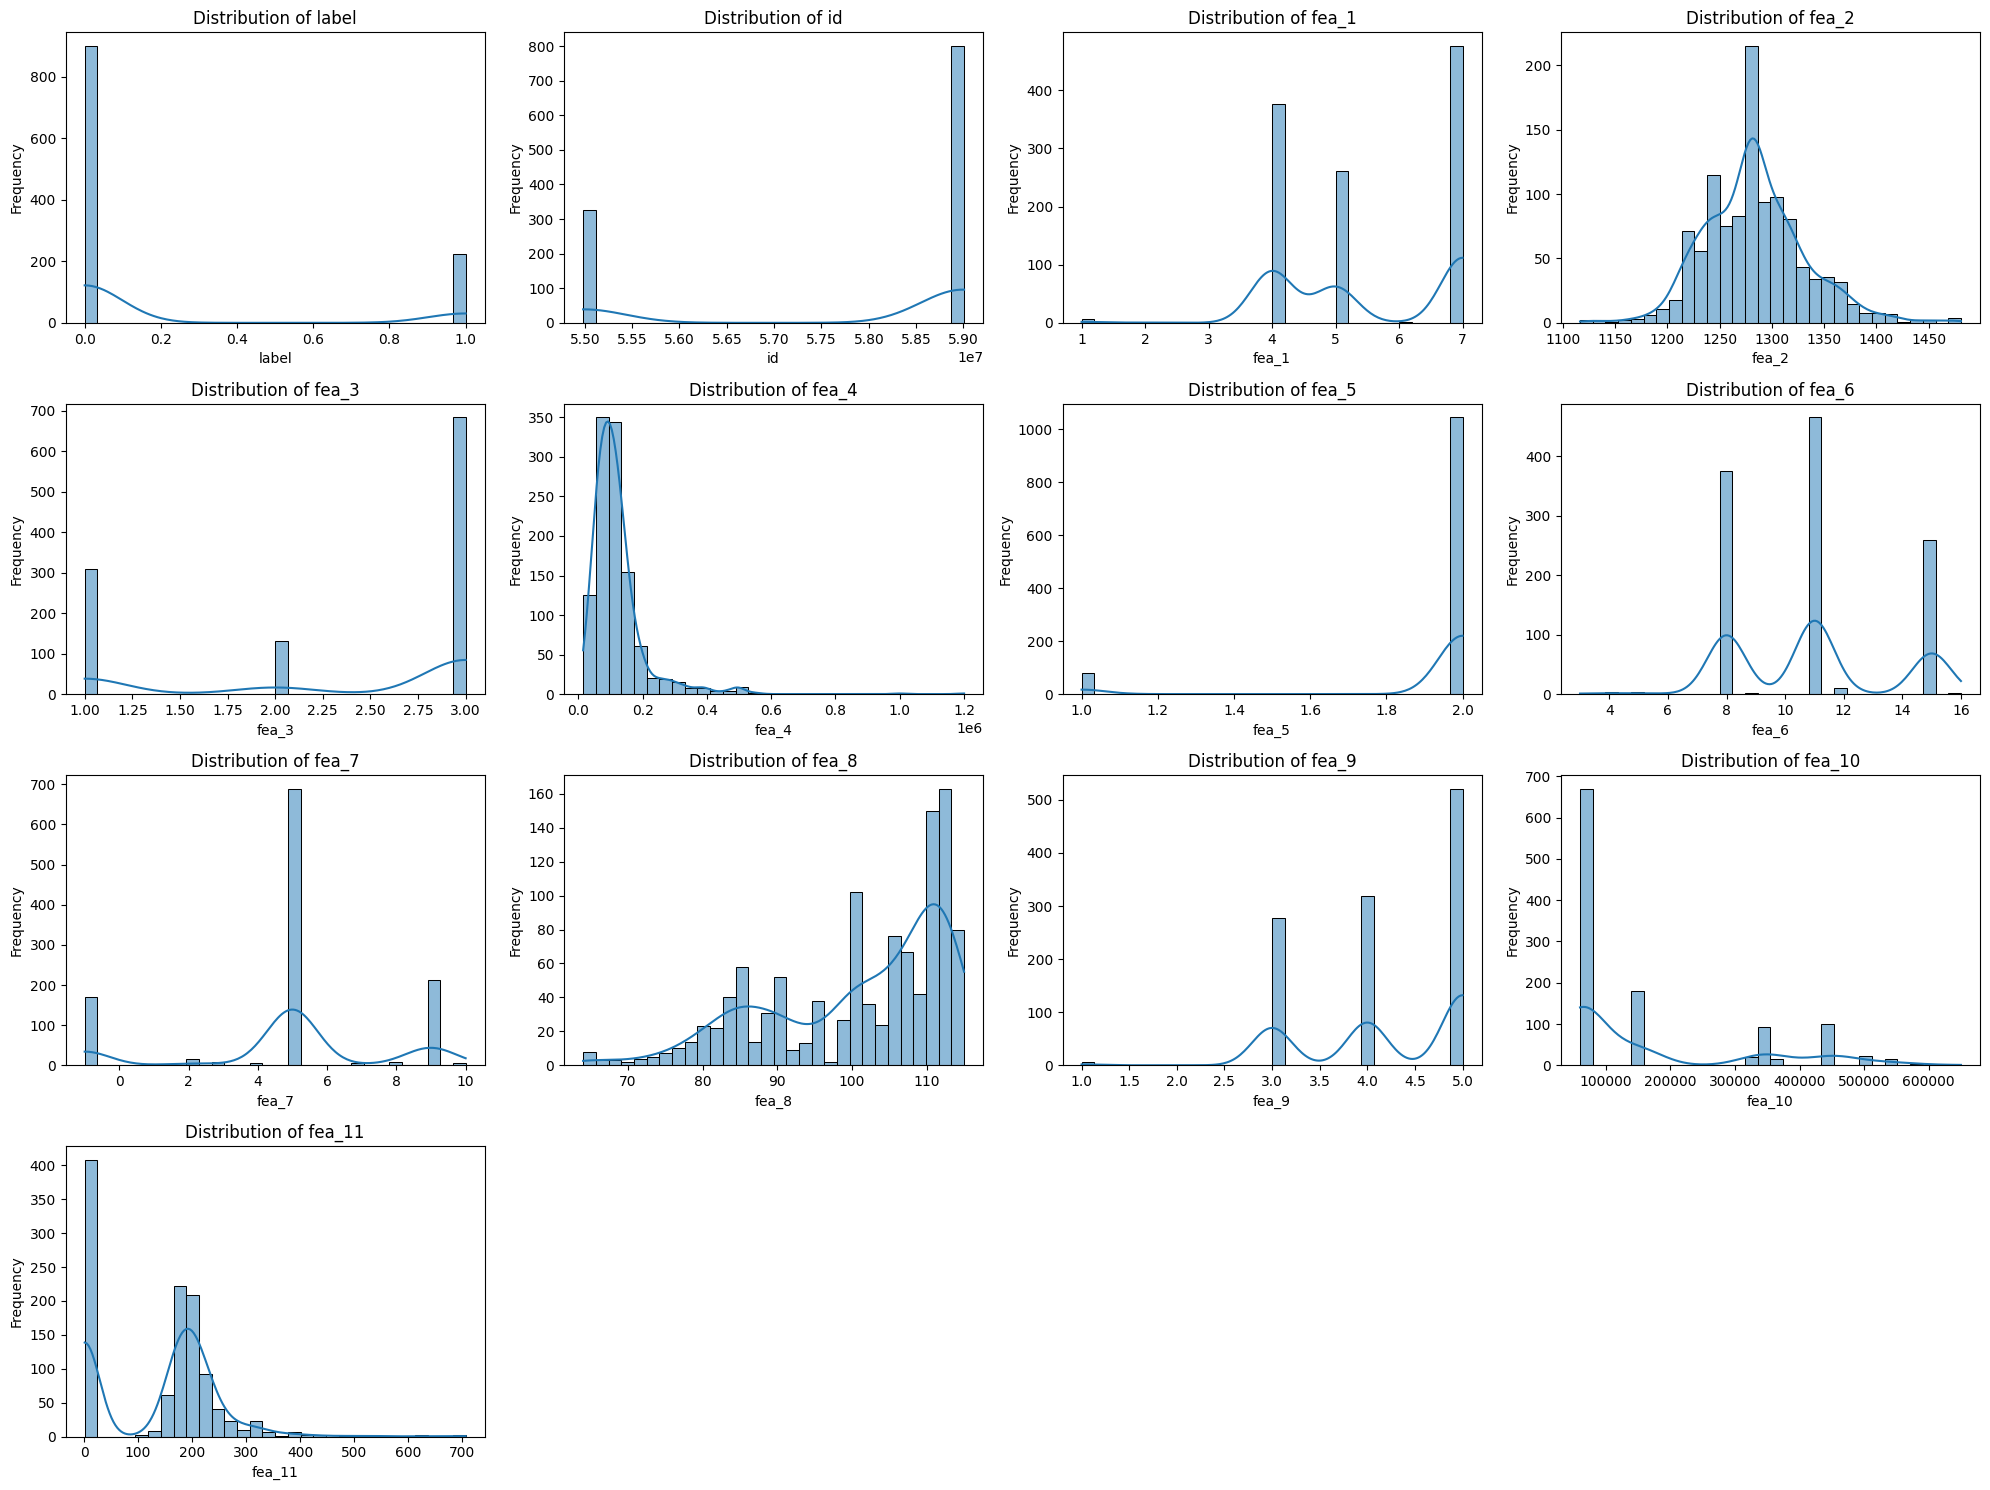

In [13]:
# Univariate Analysis for customer_data

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

# Loop through the columns in customer_data to generate visualizations
for i, column in enumerate(customer_data.columns, 1):
    plt.subplot(4, 4, i)

    # If the column is non-numeric (categorical), plot a bar plot
    if customer_data[column].dtype == 'object' and column != 'id':
        sns.countplot(data=customer_data, x=column)
        plt.xticks(rotation=45)

    # Else, plot a histogram for numeric columns
    else:
        sns.histplot(customer_data[column], bins=30, kde=True)

    plt.title(f'Distribution of {column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

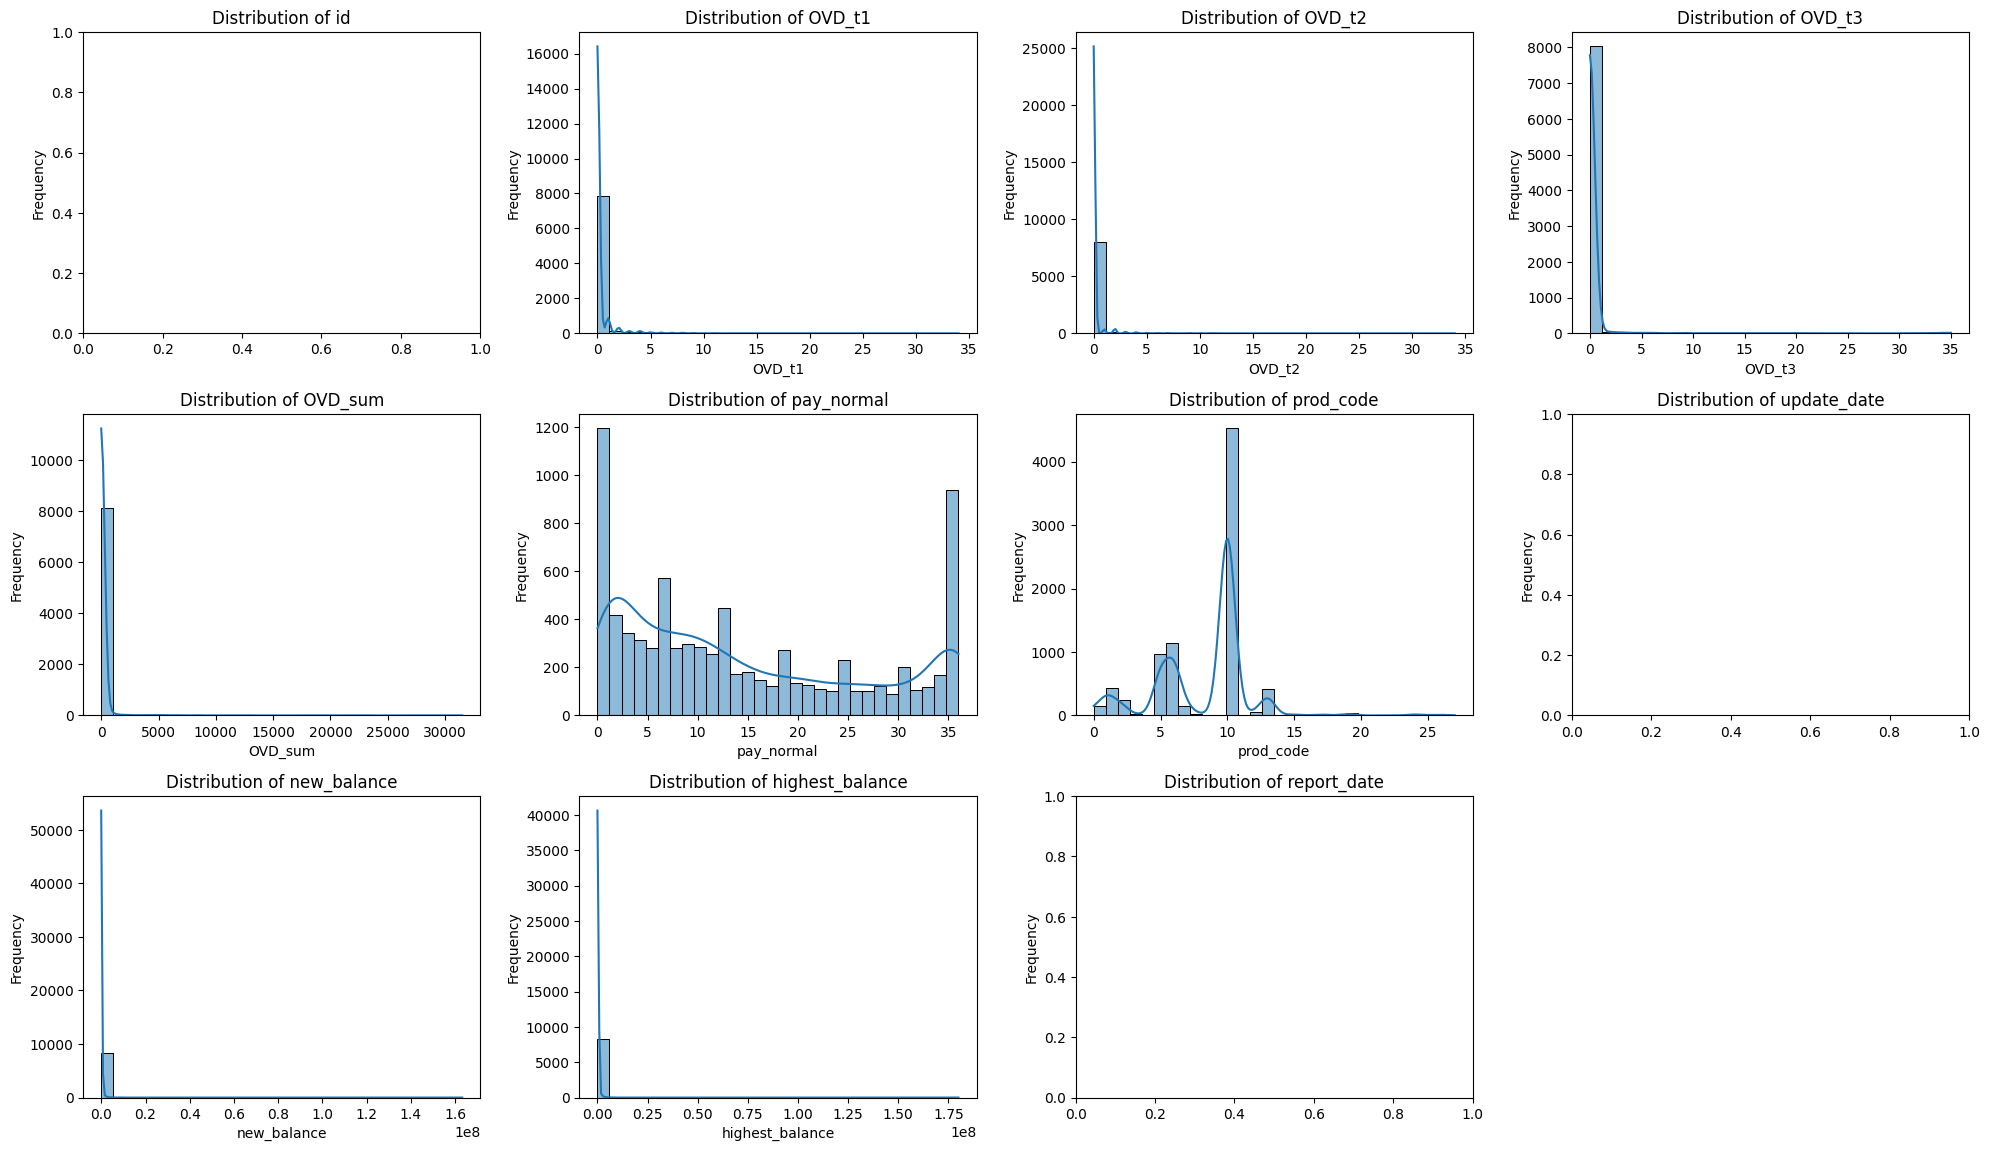

In [14]:
# Univariate Analysis of payment_data
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

# Loop through the columns in payment_data to generate visualizations
for i, column in enumerate(payment_data.columns, 1):
    plt.subplot(4, 4, i)

    # If the column is non-numeric (categorical), plot a bar plot
    if payment_data[column].dtype == 'object' and column not in ['id', 'report_date', 'update_date']:
        sns.countplot(data=payment_data, x=column)
        plt.xticks(rotation=45)

    # Plot histograms for numeric columns
    elif column not in ['id', 'report_date', 'update_date']:
        sns.histplot(payment_data[column], bins=30, kde=True)

    plt.title(f'Distribution of {column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Adding New Column to Dataset
I think the ratio of new_balance to highest_balance might be indicative of a customer's recent spending behavior. A ratio close to 1 indicates that the customer's current balance is near their historical highest, suggesting increased recent spending, while a ratio close to 0 indicates the opposite. So, let's create another new column.

In [15]:
# Creating the 'balance_rate' column
payment_data['balance_rate'] = payment_data['new_balance'] / payment_data['highest_balance']

# Replace potential infinite values due to division by zero with NaN
payment_data['balance_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the first few rows of payment_data to verify the new column
payment_data.head()


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,update_date,new_balance,highest_balance,report_date,balance_rate
0,58987402,0,0,0,0,1,10,04/12/2016,0.0,44047.0,21/09/2015,0.000000
1,58995151,0,0,0,0,1,5,04/12/2016,588720.0,491100.0,21/09/2015,1.198778
2,58997200,0,0,0,0,2,5,04/12/2016,840000.0,700500.0,22/04/2016,1.199143
3,54988608,0,0,0,0,3,10,03/12/2016,8425.2,7520.0,25/04/2016,1.120372
4,54987763,0,0,0,0,2,10,03/12/2016,15147.6,44047.0,26/04/2016,0.343896


As we can see from the first few rows, the balance_rate column provides insight into how the current balance (new_balance) relates to the highest balance a customer has ever had (highest_balance).

A value greater than 1 indicates that the current balance exceeds the highest balance, which could be a potential risk factor.

In [16]:
# Drop the 'update_date' and 'report_date' columns
payment_data = payment_data.drop(columns=['update_date', 'report_date'])

# Display the first few rows of payment_data to verify the columns have been dropped
print(payment_data.head())


         id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0  58987402       0       0       0        0           1         10   
1  58995151       0       0       0        0           1          5   
2  58997200       0       0       0        0           2          5   
3  54988608       0       0       0        0           3         10   
4  54987763       0       0       0        0           2         10   

   new_balance  highest_balance  balance_rate  
0          0.0          44047.0      0.000000  
1     588720.0         491100.0      1.198778  
2     840000.0         700500.0      1.199143  
3       8425.2           7520.0      1.120372  
4      15147.6          44047.0      0.343896  


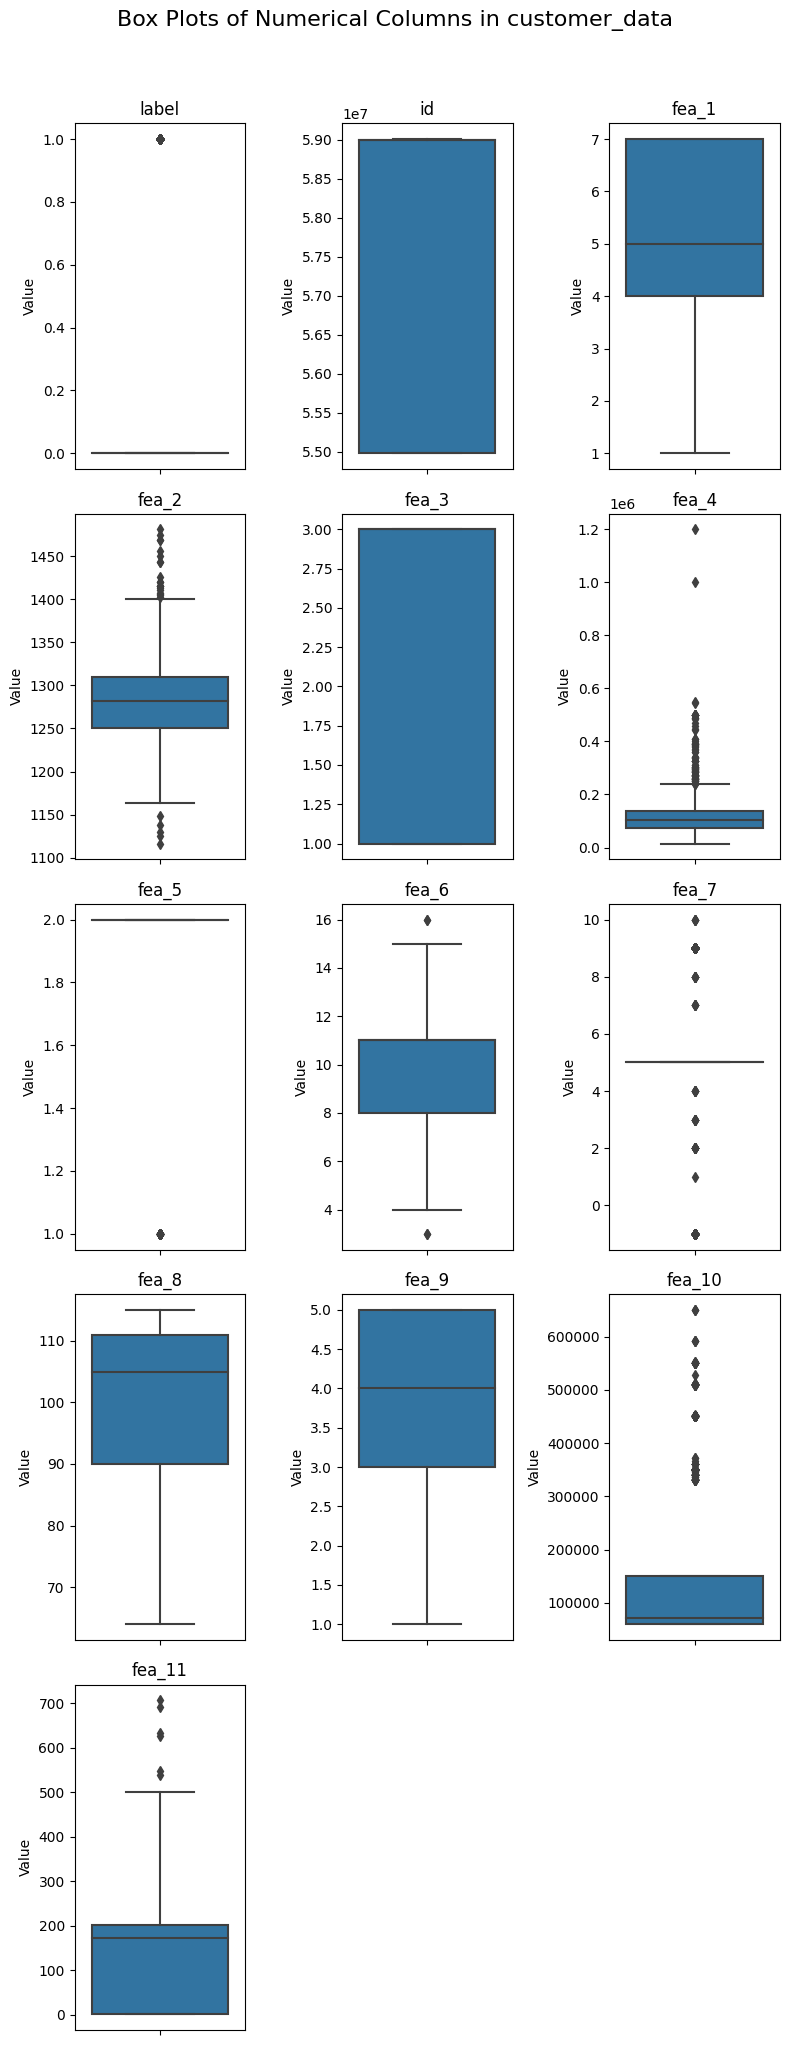

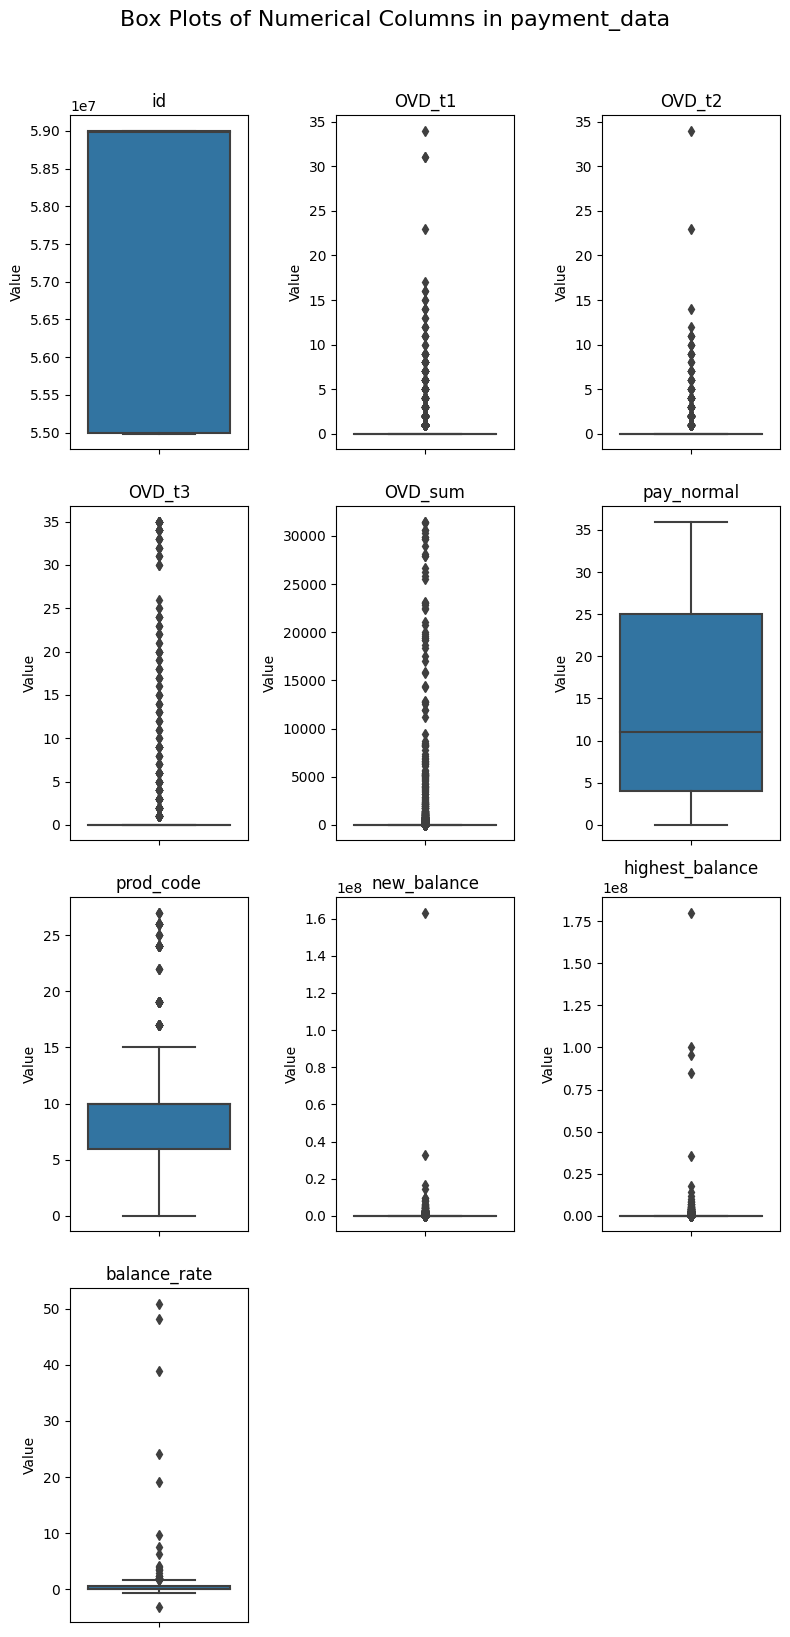

In [17]:
# Function to plot box plots for numerical columns in a matrix format
def plot_boxplots_matrix(data, title):
    num_cols = data.select_dtypes(exclude='object').columns
    num_plots = len(num_cols)
    cols = 3  # Number of columns in the matrix
    rows = -(-num_plots // cols)  # Calculate number of rows needed

    plt.figure(figsize=(8, 4 * rows))
    plt.suptitle(title, y=1.02, fontsize=16)

    for i, column in enumerate(num_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=data[column])
        plt.title(column)
        plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

# Plot box plots in matrix format for customer_data and payment_data
plot_boxplots_matrix(customer_data, 'Box Plots of Numerical Columns in customer_data')
plot_boxplots_matrix(payment_data, 'Box Plots of Numerical Columns in payment_data')


In [18]:
# Calculate the IQR for the 'fea_6' column
Q1 = customer_data['fea_6'].quantile(0.25)
Q3 = customer_data['fea_6'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers below and above the bounds
outliers_below = customer_data[customer_data['fea_6'] < lower_bound]['fea_6'].count()
outliers_above = customer_data[customer_data['fea_6'] > upper_bound]['fea_6'].count()

total_outliers = outliers_below + outliers_above

total_outliers


4

In [19]:
# Calculate the IQR for the 'fea_2' column
Q1_fea_2 = customer_data['fea_2'].quantile(0.25)
Q3_fea_2 = customer_data['fea_2'].quantile(0.75)
IQR_fea_2 = Q3_fea_2 - Q1_fea_2

# Define bounds for outliers for 'fea_2'
lower_bound_fea_2 = Q1_fea_2 - 1.5 * IQR_fea_2
upper_bound_fea_2 = Q3_fea_2 + 1.5 * IQR_fea_2

# Count the number of outliers below and above the bounds for 'fea_2'
outliers_below_fea_2 = customer_data[customer_data['fea_2'] < lower_bound_fea_2]['fea_2'].count()
outliers_above_fea_2 = customer_data[customer_data['fea_2'] > upper_bound_fea_2]['fea_2'].count()

total_outliers_fea_2 = outliers_below_fea_2 + outliers_above_fea_2

total_outliers_fea_2


25

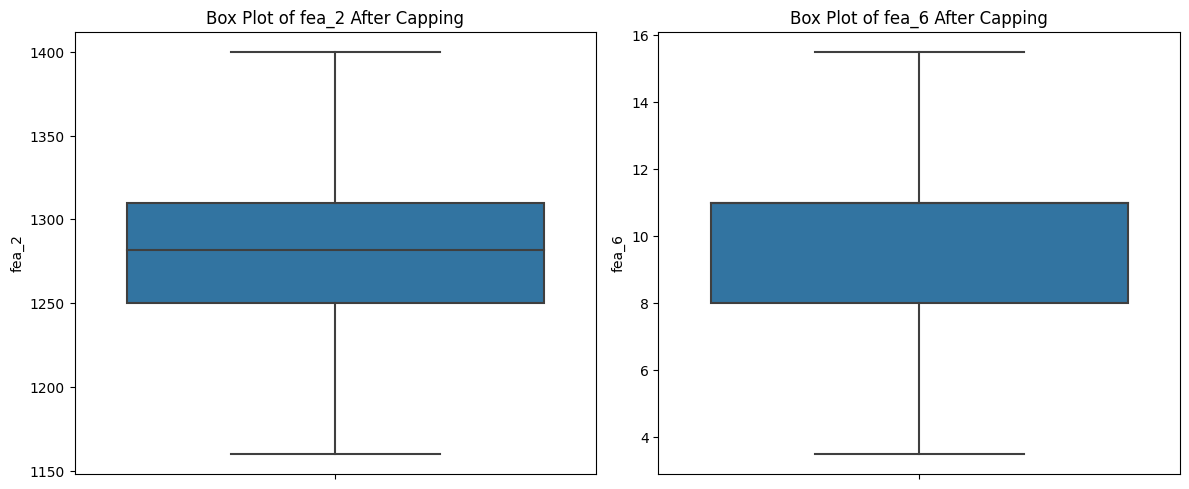

In [20]:
# Capping outliers for 'fea_6'
customer_data['fea_6'] = np.where(customer_data['fea_6'] < lower_bound, lower_bound, customer_data['fea_6'])
customer_data['fea_6'] = np.where(customer_data['fea_6'] > upper_bound, upper_bound, customer_data['fea_6'])

# Capping outliers for 'fea_2'
customer_data['fea_2'] = np.where(customer_data['fea_2'] < lower_bound_fea_2, lower_bound_fea_2, customer_data['fea_2'])
customer_data['fea_2'] = np.where(customer_data['fea_2'] > upper_bound_fea_2, upper_bound_fea_2, customer_data['fea_2'])

# Verify the changes by plotting box plots for 'fea_2' and 'fea_6' after capping
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=customer_data['fea_2'])
plt.title('Box Plot of fea_2 After Capping')

plt.subplot(1, 2, 2)
sns.boxplot(y=customer_data['fea_6'])
plt.title('Box Plot of fea_6 After Capping')

plt.tight_layout()
plt.show()


# Data Merging

Here's the plan:

Merge the customer_data and payment_data datasets using the common id column.

Drop the id column from the merged dataset since it won't add value to our modeling process.

Ensure the label column is the last column in the merged dataset as it represents the target variable.

In [21]:
# Merge the datasets on the 'id' column
merged_data = pd.merge(customer_data, payment_data, on='id')

# Drop the 'id' column
merged_data = merged_data.drop(columns='id')

# Reorder columns to have 'label' as the last column
cols = [col for col in merged_data if col != 'label'] + ['label']
merged_data = merged_data[cols]

# Display the first few rows of the merged dataset
merged_data.head()

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,...,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,new_balance,highest_balance,balance_rate,label
0,5,1245.5,3,77000.0,2,15.0,5,109,5,151300,...,0,0,0,0,9,10,6657.6,18934.0,0.351621,1
1,5,1245.5,3,77000.0,2,15.0,5,109,5,151300,...,0,0,0,0,18,10,153792.0,149387.0,1.029487,1
2,5,1245.5,3,77000.0,2,15.0,5,109,5,151300,...,0,0,0,0,1,5,0.0,150500.0,0.000000,1
3,5,1245.5,3,77000.0,2,15.0,5,109,5,151300,...,0,2,26,11906,6,10,0.0,46371.0,0.000000,1
4,4,1277.0,1,113000.0,2,8.0,-1,100,3,341759,...,0,0,0,0,4,6,15120.0,21500.0,0.703256,0


In [23]:
merged_data.shape

(8250, 21)

# Splitting Data Train and Test Set & Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the scaler
scaler = StandardScaler()

# Scaling the features again
features_to_scale = merged_data.columns.difference(['label'])
merged_data[features_to_scale] = scaler.fit_transform(merged_data[features_to_scale])

# Splitting the data into training and test sets again
X = merged_data.drop(columns=['label'])
y = merged_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((6600, 20), (1650, 20))

In [26]:
# Impute missing values in training and test sets using median for continuous columns and mode for categorical columns
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        # For categorical columns
        mode_val = X_train[column].mode()[0]
        X_train[column].fillna(mode_val, inplace=True)
        X_test[column].fillna(mode_val, inplace=True)
    else:
        # For continuous columns
        median_val = X_train[column].median()
        X_train[column].fillna(median_val, inplace=True)
        X_test[column].fillna(median_val, inplace=True)

# Re-check for missing values
missing_train_after = X_train.isnull().sum().sum()
missing_test_after = X_test.isnull().sum().sum()

missing_train_after, missing_test_after


(0, 0)

<ipython-input-58-b9518246d3d2>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(y, kde=False, bins=2, palette=palette)


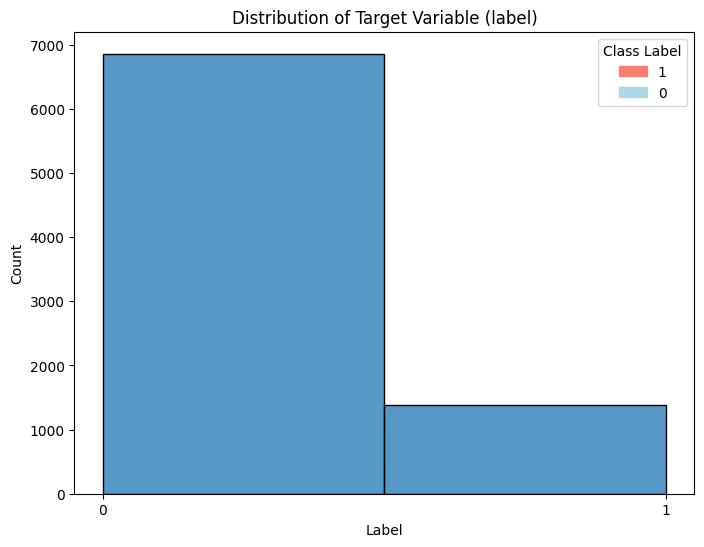

In [58]:
#Distribution of target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Using a custom color palette
palette = {0: "lightblue", 1: "salmon"}

sns.histplot(y, kde=False, bins=2, palette=palette)
plt.title("Distribution of Target Variable (label)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1])  # explicitly set x-ticks to be [0, 1]

# Adding a legend
handles = [matplotlib.patches.Patch(color=palette[x], label=x) for x in y.unique()]
plt.legend(title="Class Label", handles=handles)

plt.show()



In imbalanced datasets, accuracy might not be the best metric. We should consider using precision, recall, the F1 score, or the ROC-AUC score, which might provide a better understanding of the model's performance, especially for the minority class.

# Modeling

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluating the models
models = ['Logistic Regression', 'Random Forest', 'Neural Network', 'Gradient Boosting']
model_predictions = [logreg_preds, rf_preds, mlp_preds, gboost_preds]

# Calculate precision, recall, and F1 score for each model
precision_scores = [precision_score(y_test, pred) for pred in model_predictions]
recall_scores = [recall_score(y_test, pred) for pred in model_predictions]
f1_scores = [f1_score(y_test, pred) for pred in model_predictions]

evaluation_results = pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

evaluation_results.sort_values(by='F1 Score', ascending=False)


,Model,Precision,Recall,F1 Score
1,Random Forest,1.000000,0.721805,0.838428
2,Neural Network,0.863636,0.785714,0.822835
3,Gradient Boosting,0.925532,0.327068,0.483333
0,Logistic Regression,0.400000,0.007519,0.014760


- The Random Forest model is performing the best in terms of F1 score, which balances precision and recall. It has high precision, which means that when it predicts a positive class, it's usually correct. It also has a relatively good recall, suggesting it's capturing a good proportion of the actual positive cases.

- The Neural Network model has decent precision and recall, resulting in an F1 score of 0.644.

- The Gradient Boosting model has a high precision but a lower recall, which means it's conservative in predicting the positive class but when it does, it's often correct.

- The Logistic Regression model has a very low F1 score, which indicates poor performance in both precision and recall.

Given that we have an imbalanced dataset, these metrics (especially the F1 score) provide a more informative evaluation of the models than accuracy alone.

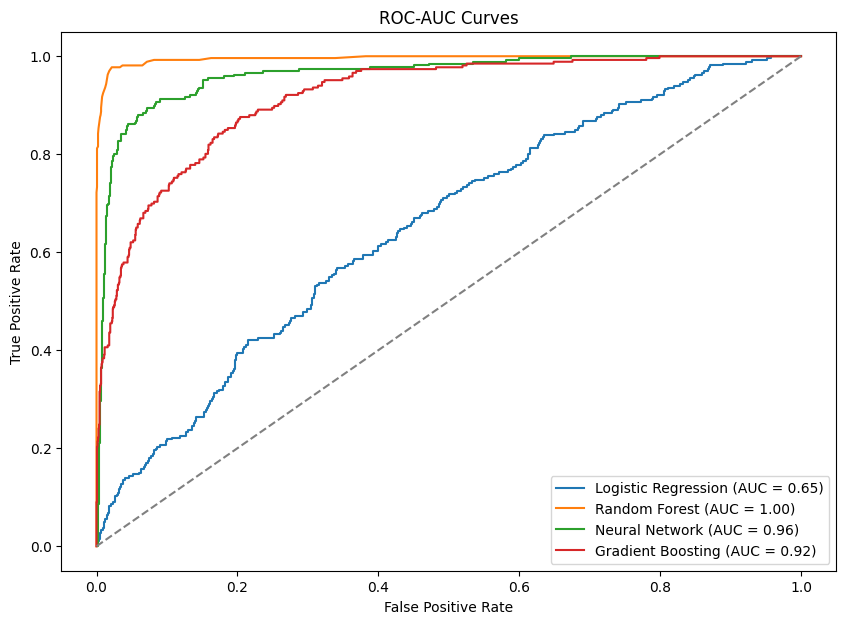

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class for each model
logreg_probs = logreg.predict_proba(X_test)[:, 1]
rf_probs = random_forest.predict_proba(X_test)[:, 1]
mlp_probs = mlp.predict_proba(X_test)[:, 1]
gboost_probs = gradient_boosting.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_probs)
fpr_gboost, tpr_gboost, _ = roc_curve(y_test, gboost_probs)

# AUC scores
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_mlp = auc(fpr_mlp, tpr_mlp)
auc_gboost = auc(fpr_gboost, tpr_gboost)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"Neural Network (AUC = {auc_mlp:.2f})")
plt.plot(fpr_gboost, tpr_gboost, label=f"Gradient Boosting (AUC = {auc_gboost:.2f})")

# Plotting reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves")
plt.legend()
plt.show()


- The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds. The diagonal line represents the behavior of a random classifier, which is the worst-case scenario, resulting in an Area Under the Curve (AUC) of 0.5.
A model with a curve that hugs the top-left corner and has an AUC closer to 1 is performing well.
From the plot:

1- **Gradient Boosting** has the highest AUC (around 0.99), making it the best performer among the three in terms of distinguishing between the classes.

2- **Random Forest** also performs well with an AUC of approximately 0.98.

3- **Logistic Regression**, while still performing reasonably well, has an AUC of around 0.94, making it the least effective of the three at class discrimination.

The higher the AUC, the better the model's ability to distinguish between positive and negative classes. Thus, based on the ROC-AUC analysis, Gradient Boosting and Random Forest are standout performers.

# Feature Importance Analysis

<ipython-input-59-0c79ac4fa98d>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), orientation='vertical')


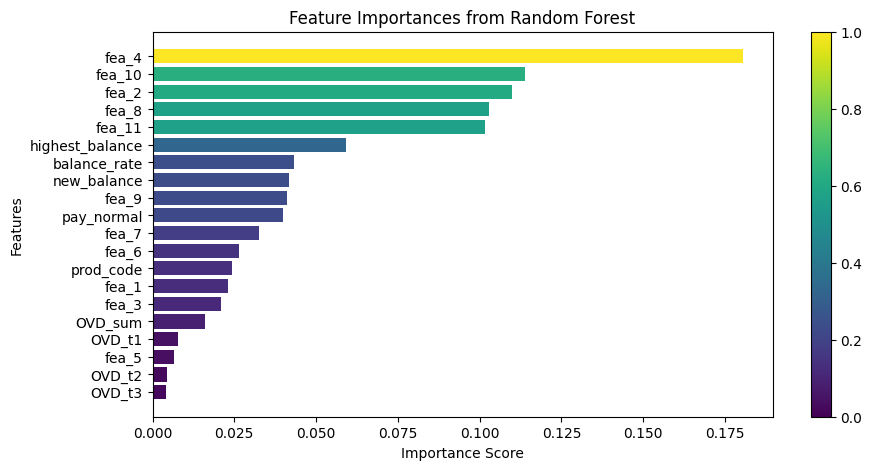

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Plotting the feature importances using a colormap
colors = plt.cm.viridis(feature_importances / max(feature_importances))
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 5))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color=colors[sorted_idx])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), orientation='vertical')
plt.show()



- Features like fea_4, fea_10, fea_2, and fea_11 are crucial for the Random Forest model in making predictions. This indicates that these features, which likely represent some characteristics or behaviors of the customers, play a pivotal role in determining the outcome.

- Balance information (highest_balance and new_balance) is also significant. It makes sense, as the balance amounts might be indicative of a customer's financial health or recent activities.

Other features have less importance but still contribute to the model's decision-making.